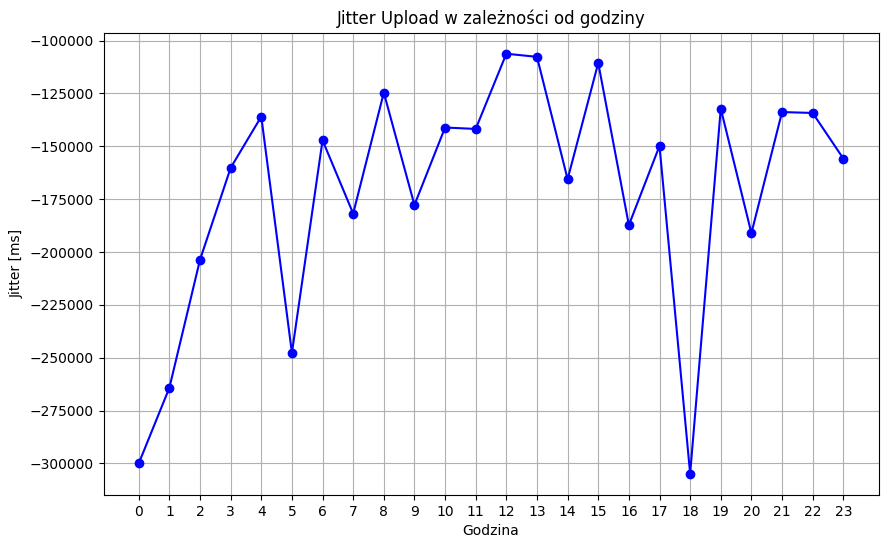

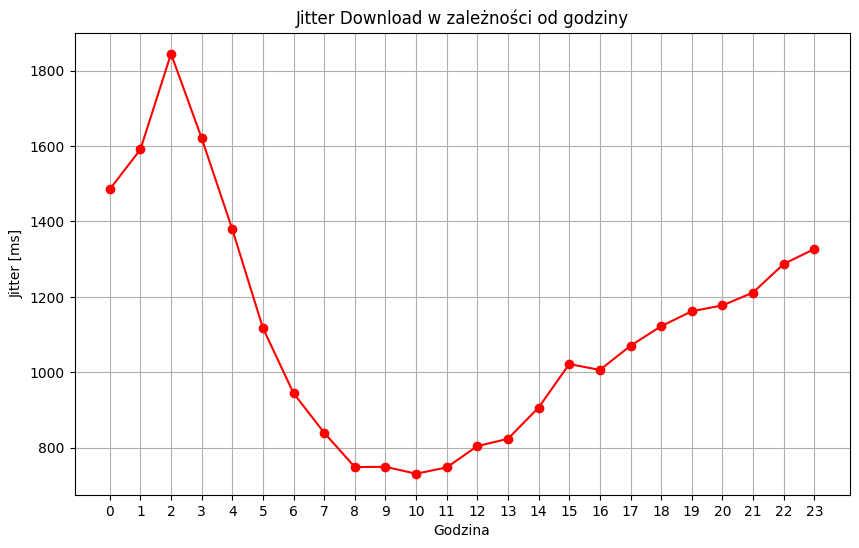

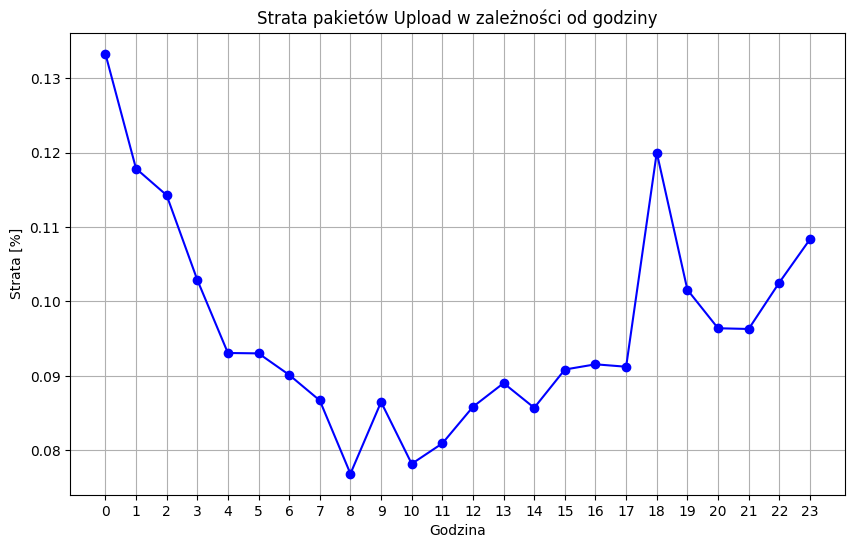

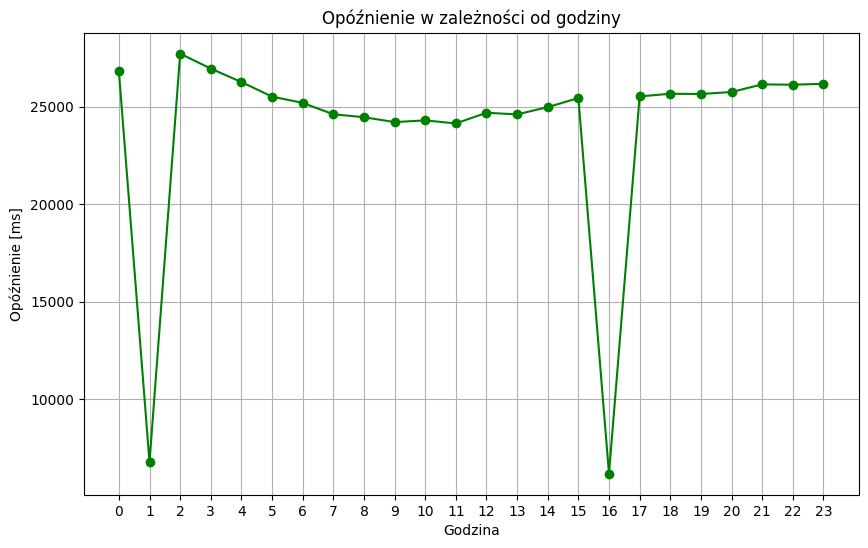

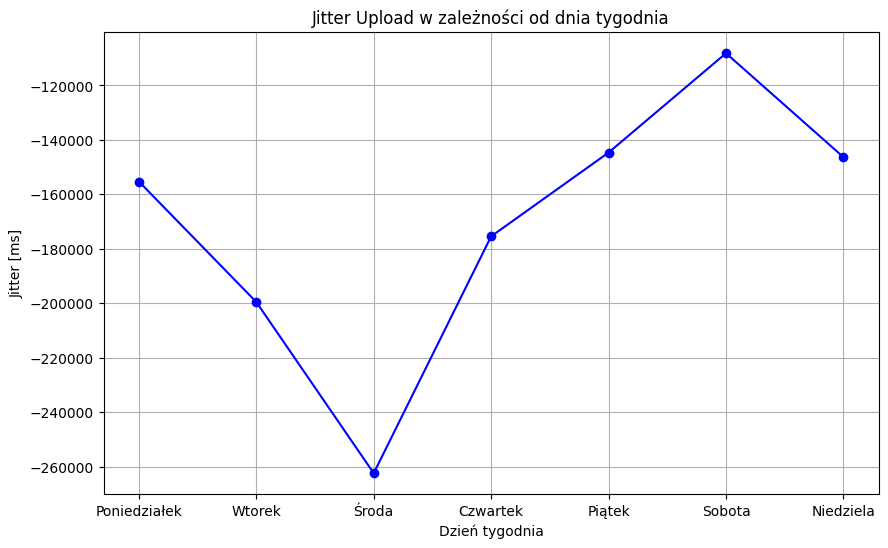

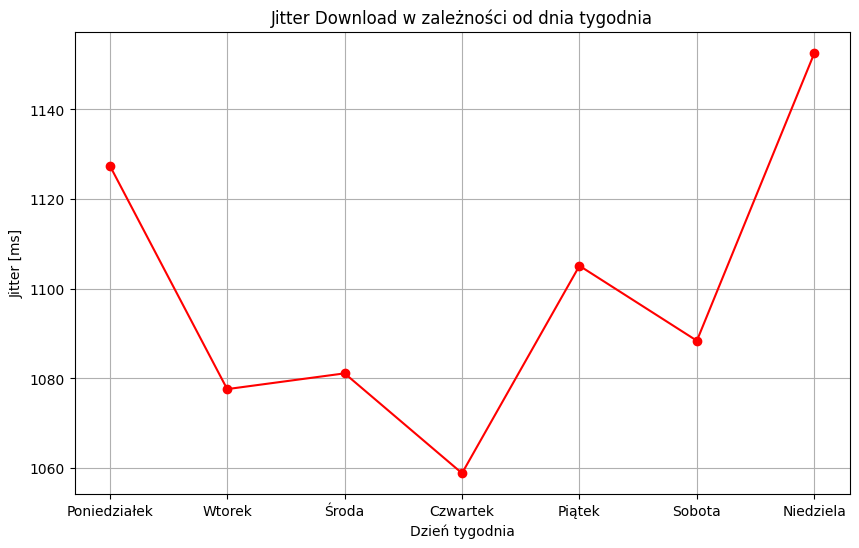

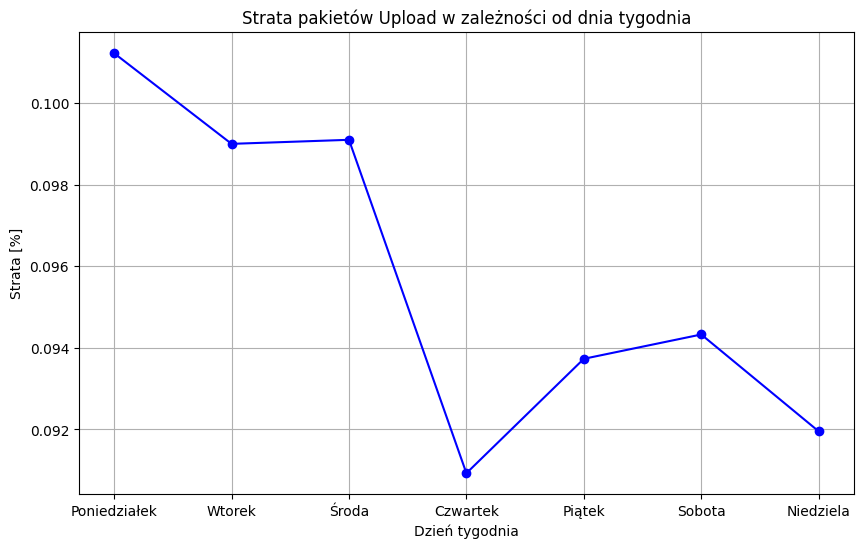

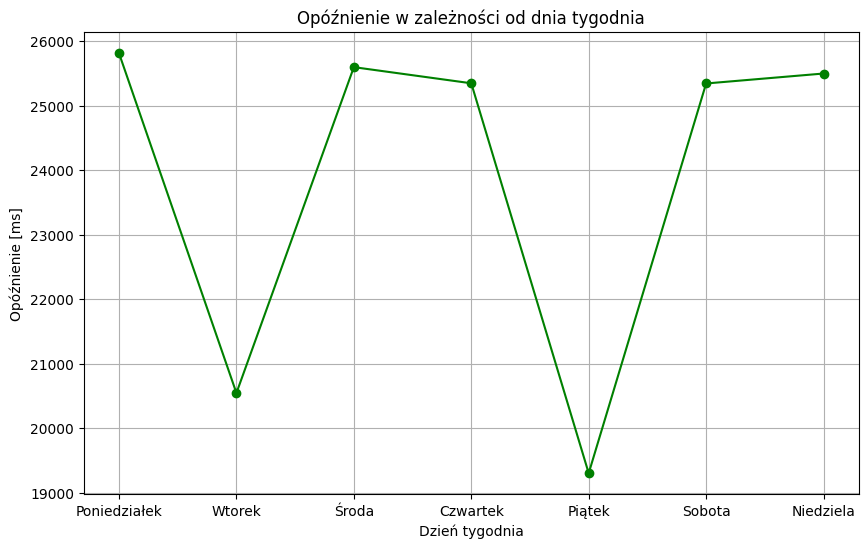

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie i przygotowanie danych
jitter_df = pd.read_csv('data/curr_udpjitter.csv', parse_dates=['dtime'])

jitter_df['hour'] = jitter_df['dtime'].dt.hour
jitter_df['day_of_week'] = jitter_df['dtime'].dt.dayofweek.map({
    0: 'Poniedziałek',
    1: 'Wtorek',
    2: 'Środa',
    3: 'Czwartek',
    4: 'Piątek',
    5: 'Sobota',
    6: 'Niedziela'
})

jitter_df['packet_loss_up'] = (jitter_df['packets_up_sent'] - jitter_df['packets_up_recv']) / jitter_df['packets_up_sent'] * 100
jitter_df['packet_loss_down'] = (jitter_df['packets_down_sent'] - jitter_df['packets_down_recv']) / jitter_df['packets_down_sent'] * 100

hourly_agg = jitter_df.groupby('hour').mean(numeric_only=True).reset_index()
daily_agg = jitter_df.groupby('day_of_week').mean(numeric_only=True).reindex([
    'Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela'
]).reset_index()

# Wykresy godzinowe
plt.figure(figsize=(10, 6))
plt.plot(hourly_agg['hour'], hourly_agg['jitter_up'], 'b-o')
plt.title('Jitter Upload w zależności od godziny')
plt.xlabel('Godzina')
plt.ylabel('Jitter [ms]')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(hourly_agg['hour'], hourly_agg['jitter_down'], 'r-o')
plt.title('Jitter Download w zależności od godziny')
plt.xlabel('Godzina')
plt.ylabel('Jitter [ms]')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(hourly_agg['hour'], hourly_agg['packet_loss_up'], 'b-o')
plt.title('Strata pakietów Upload w zależności od godziny')
plt.xlabel('Godzina')
plt.ylabel('Strata [%]')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(hourly_agg['hour'], hourly_agg['latency'], 'g-o')
plt.title('Opóźnienie w zależności od godziny')
plt.xlabel('Godzina')
plt.ylabel('Opóźnienie [ms]')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Wykresy dzienne
plt.figure(figsize=(10, 6))
plt.plot(daily_agg['day_of_week'], daily_agg['jitter_up'], 'b-o')
plt.title('Jitter Upload w zależności od dnia tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Jitter [ms]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_agg['day_of_week'], daily_agg['jitter_down'], 'r-o')
plt.title('Jitter Download w zależności od dnia tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Jitter [ms]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_agg['day_of_week'], daily_agg['packet_loss_up'], 'b-o')
plt.title('Strata pakietów Upload w zależności od dnia tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Strata [%]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_agg['day_of_week'], daily_agg['latency'], 'g-o')
plt.title('Opóźnienie w zależności od dnia tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Opóźnienie [ms]')
plt.grid(True)
plt.show()